# Problem Statement



A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.



In [1119]:
# importing the requisite libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')


### 1.1 Simple Linear Regression

#### We will build a model using TV spend on advertisements to predict sales

In [1120]:
# Reading the dataset

df = pd.read_csv('train.csv')

In [1121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [1122]:
df.head()
df.shape


(1460, 81)

# Clean up

In [1123]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

### Check null percenatge if its >=80 we will drop them

In [1124]:
df.isnull().sum()


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [1125]:
round(df.isnull().sum()/len(df.index)*100,2)


Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 81, dtype: float64

In [1126]:
null_values = (df.isna().sum()/df.shape[0])*100
null_values.sort_values(ascending=False,inplace=True)

null_values


PoolQC         99.520548
MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
FireplaceQu    47.260274
                 ...    
ExterQual       0.000000
Exterior2nd     0.000000
Exterior1st     0.000000
RoofMatl        0.000000
SalePrice       0.000000
Length: 81, dtype: float64

- PoolQC         99.520548
- MiscFeature    96.301370
- Alley          93.767123
- Fence          80.753425
 
 Are Having>=80% so we can drop them
 

In [1127]:
df = df.drop(['Id','PoolQC','MiscFeature','Alley','Fence'],axis=1)
#todo FireplaceQu

In [1128]:
#check 
null_values = (df.isna().sum()/df.shape[0])*100
null_values.sort_values(ascending=False,inplace=True)
null_values


FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
                  ...    
TotalBsmtSF      0.000000
Heating          0.000000
MSZoning         0.000000
CentralAir       0.000000
SalePrice        0.000000
Length: 76, dtype: float64

In [1129]:
df.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


# EDA 

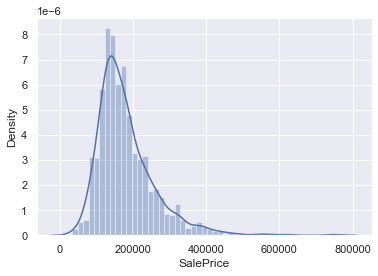

In [1130]:
plt.figure()
sns.distplot(df['SalePrice'],color='b')
plt.show()

In [1131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

### Correlation between numerical columns

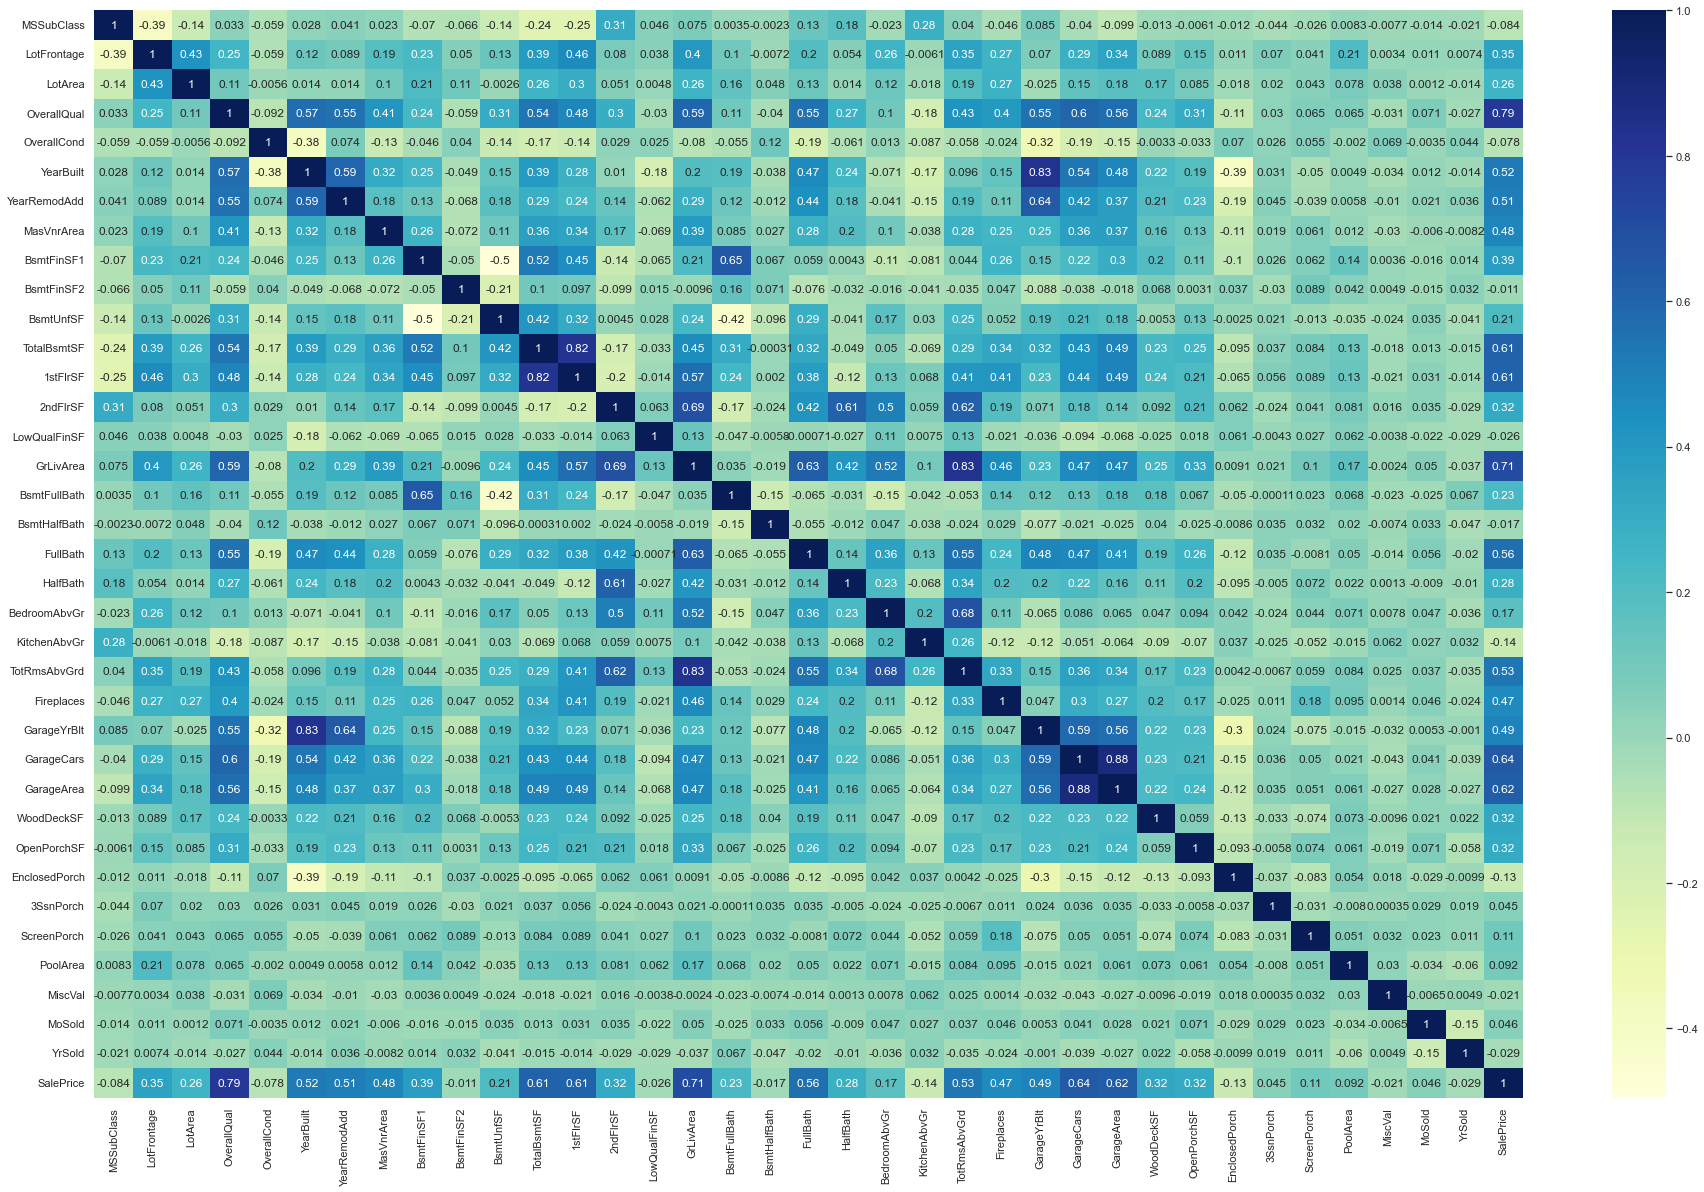

In [1132]:
plt.figure(figsize = (32, 20))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

Below features are highly correlated 

- LotFrontage
- Year removeadd
- MasVnrArea
- TotalBsmn SF
- 1st Foor SF
- Gr ving Area
- Fullbath
- Fireplacesqu
- Garage Area
- Overall Quality
- Year Built


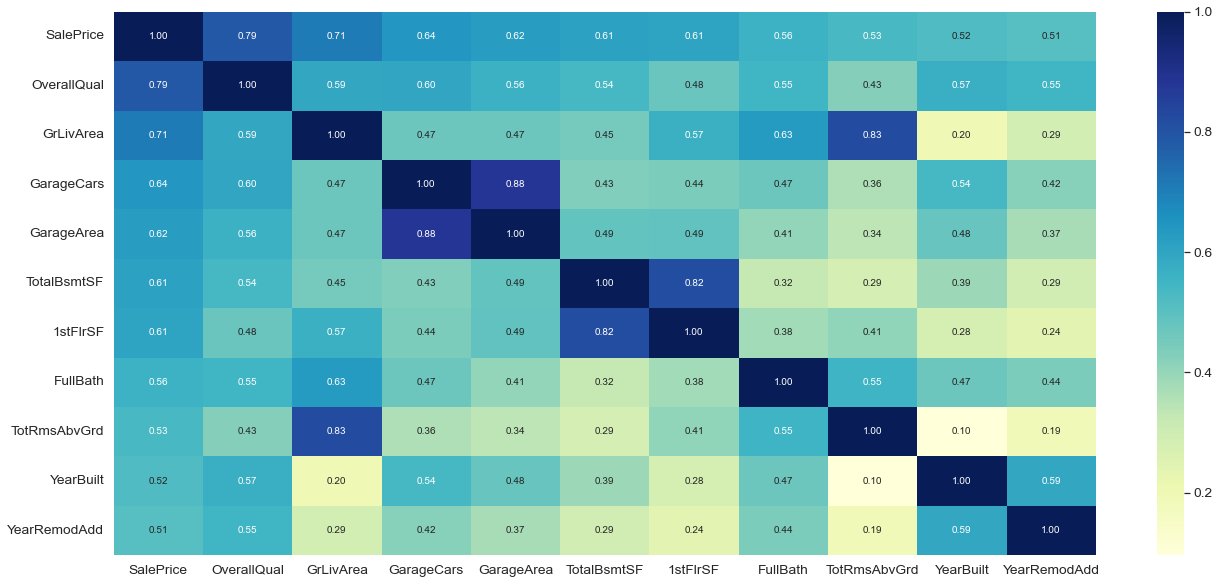

In [1133]:
k = 11
plt.figure(figsize = (22, 10))

cols = df.corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values,cmap="YlGnBu")
plt.show()


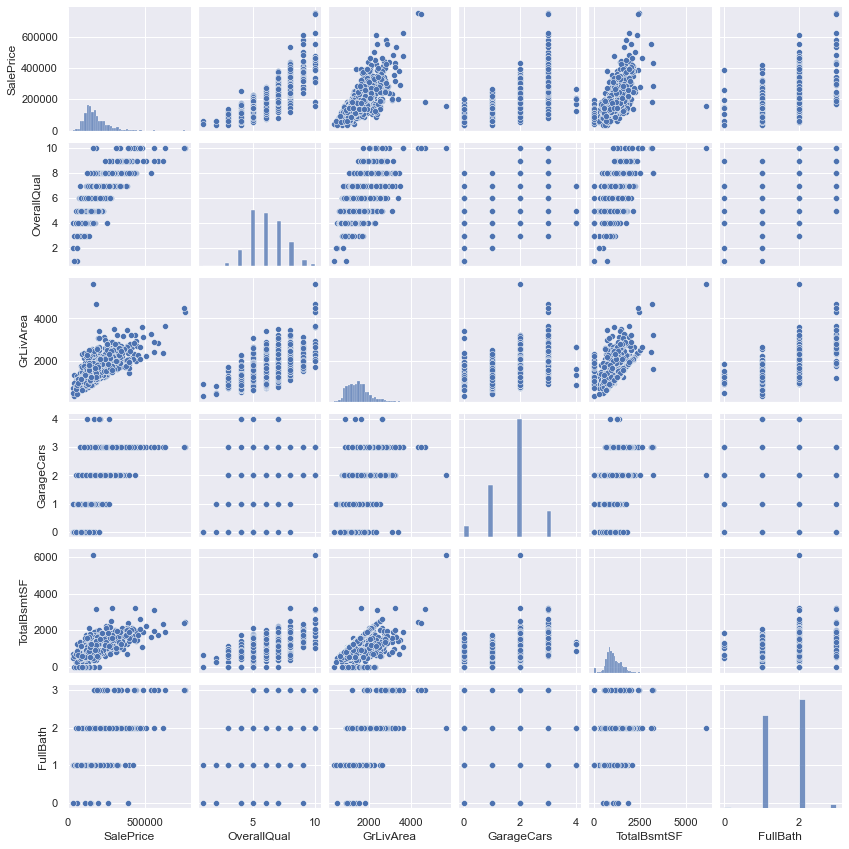

In [1134]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath']
sns.pairplot(df[cols], height=2)
plt.show()


In [1135]:


df.drop(['BsmtCond','BsmtFinType2','BsmtExposure','GarageQual','GarageYrBlt','GarageCond','MasVnrArea'],axis=1,inplace = True)



# dummy variable for categorical variable
Creating dummy variables for a categorical variable involves creating a new binary variable for each category of the original variable.

Reasons for creating dummy variables is that most statistical models, such as linear regression, require that the independent variables be numerical.

In [1136]:
df.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtFinType1', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [1137]:
df=pd.get_dummies(df,drop_first=True)
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,706,0,150,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,978,0,284,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,486,0,434,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,216,0,540,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,655,0,490,...,0,0,0,0,1,0,0,0,1,0


In [1138]:
# Check for missing values, ie , NAN

nanData  = df.isna().sum().sort_values(ascending=False)
print(nanData)


LotFrontage              259
MSSubClass                 0
ExterQual_Gd               0
Exterior2nd_Other          0
Exterior2nd_Plywood        0
                        ... 
Neighborhood_Timber        0
Neighborhood_Veenker       0
Condition1_Feedr           0
Condition1_Norm            0
SaleCondition_Partial      0
Length: 216, dtype: int64


In [1139]:
df['LotFrontage'].fillna('0', inplace = True)

nanData  = df.isna().sum().sort_values(ascending=False)
print(nanData) # Its Seems clean now


MSSubClass               0
ExterQual_Gd             0
Exterior2nd_Other        0
Exterior2nd_Plywood      0
Exterior2nd_Stone        0
                        ..
Neighborhood_Timber      0
Neighborhood_Veenker     0
Condition1_Feedr         0
Condition1_Norm          0
SaleCondition_Partial    0
Length: 216, dtype: int64


In [1140]:
df.isnull().sum()

MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 216, dtype: int64

In [1141]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.0,50.0,70.0,190.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.5,9478.5,11601.5,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.0,6.0,7.0,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.0,5.0,6.0,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.0,1973.0,2000.0,2010.0
...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,1460.0,0.002740,0.052289,0.0,0.0,0.0,0.0,1.0
SaleCondition_Alloca,1460.0,0.008219,0.090317,0.0,0.0,0.0,0.0,1.0
SaleCondition_Family,1460.0,0.013699,0.116277,0.0,0.0,0.0,0.0,1.0
SaleCondition_Normal,1460.0,0.820548,0.383862,0.0,1.0,1.0,1.0,1.0


In [1142]:
print(df['PoolArea'].value_counts())
print(df['MiscVal'].value_counts())
print(df['3SsnPorch'].value_counts())

0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64
0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: MiscVal, dtype: int64
0      1436
168       3
144       2
180       2
216       2
290       1
153       1
96        1
23        1
162       1
182       1
196       1
320       1
245       1
238       1
508       1
140       1
130       1
407       1
304       1
Name: 3SsnPorch, dtype: int64


In [1143]:
# Lets drop this as its having less values
df = df.drop(['PoolArea','MiscVal','3SsnPorch'],axis=1)

In [1144]:
df['LotFrontage'].fillna('0', inplace = True)



In [1145]:
df.shape

(1460, 213)

In [1146]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error

# Splitting the data as train and test set

In [1147]:
y = df.pop('SalePrice')
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [1148]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)


In [1149]:
print(X_train.shape)
print(X_test.shape)

(1021, 212)
(438, 212)


## Scaling 

In [1150]:
#scale only numerical features
X_train.select_dtypes(include=['int64','int32','float64','float32']).columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold'],
      dtype='object')

In [1151]:
num_vars =['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       'ScreenPorch', 'MoSold', 'YrSold']

X_train[num_vars].head()


,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold
210,30,5604,5,6,1925,1950,468,0,864,864,...,2,1,0,0,0,0,96,0,4,2008
318,60,9900,7,5,1993,1993,987,0,1347,1372,...,4,1,1,656,340,60,144,0,4,2009
239,50,8741,6,4,1945,1950,94,0,735,798,...,3,1,1,220,0,140,0,0,4,2010
986,50,5310,6,8,1910,2003,0,0,485,1001,...,2,1,0,255,394,0,0,0,6,2006
1416,190,11340,4,6,1885,1950,0,0,777,1246,...,4,2,0,560,0,0,114,0,4,2010


In [1152]:
#Scaling using MinMax
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#scaler = StandardScaler()
scaler=MinMaxScaler()
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])


In [1153]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,0.058824,67.0,0.019306,0.444444,0.625,0.384058,0.000000,0.082920,0.0,396,...,0,0,0,0,1,0,0,0,1,0
318,0.235294,90.0,0.039403,0.666667,0.500,0.876812,0.716667,0.174876,0.0,360,...,0,0,0,0,1,0,0,0,1,0
239,0.176471,52.0,0.033981,0.555556,0.375,0.528986,0.000000,0.016655,0.0,641,...,0,0,0,0,1,0,0,0,1,0
986,0.176471,59.0,0.017931,0.555556,0.875,0.275362,0.883333,0.000000,0.0,485,...,0,0,0,0,1,0,0,0,1,0
1416,1.000000,60.0,0.046139,0.333333,0.625,0.094203,0.000000,0.000000,0.0,777,...,0,0,0,0,1,0,0,0,1,0


In [1154]:
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1436,0.000000,60.0,0.035192,0.333333,0.625,0.717391,0.350000,0.109142,0.0,248,...,0,0,0,0,1,0,0,0,1,0
57,0.235294,89.0,0.047566,0.666667,0.500,0.956522,0.900000,0.000000,0.0,860,...,0,0,0,0,1,0,0,0,1,0
780,0.000000,63.0,0.029930,0.666667,0.500,0.891304,0.766667,0.000000,0.0,1237,...,0,0,0,0,1,0,0,0,1,0
382,0.235294,79.0,0.036338,0.666667,0.500,0.971014,0.933333,0.000000,0.0,939,...,0,0,0,0,1,0,0,0,1,0
1170,0.352941,76.0,0.039309,0.555556,0.625,0.760870,0.450000,0.092488,0.0,574,...,0,0,0,0,1,0,0,0,1,0


# Model building

In [1155]:
# # Running RFE with the output number of the variable equal to 10
# lm = LinearRegression()
# lm.fit(X_train, y_train)

# rfe = RFE(lm, 25)             # running RFE
# rfe = rfe.fit(X_train, y_train)

# y_pred_train = RFE.predict(X_train)
# y_pred_test = RFE.predict(X_test)


## Ridge

In [1175]:
params= {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_ridge = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_ridge.fit(X_train, y_train) 


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1176]:
print(model_ridge.best_params_)
print(model_ridge.best_score_)

{'alpha': 0.01}
-19265.45227102357


In [1181]:
# Try with different alpha. [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
#                                    0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
#                                    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
#                                    100, 500, 1000]
ridge = Ridge(alpha=0.01)
ridge.fit(X_train, y_train)

y_train_pred=ridge.predict(X_train)
r2_score(y_train,y_train_pred)



0.9421004021428135

In [1182]:
ridge = Ridge(alpha=0.01)
ridge.fit(X_test, y_test)

y_test_pred=ridge.predict(X_test)
r2_score(y_test,y_test_pred)


0.9488518587693748

## Lasso

In [1184]:
lasso = Lasso()
params = {'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.003,0,10, 20]}

# cross validation
model_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)            

model_lasso.fit(X_train, y_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.003, 0, 10,
                                   20]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1185]:
print(model_lasso.best_params_)
print(model_lasso.best_score_)

{'alpha': 20}
-18267.074985646123


In [1187]:

lasso = Lasso(alpha=10)
        
lasso.fit(X_train, y_train) 
y_train_pred=lasso.predict(X_train)
print(r2_score(y_train,y_train_pred))


lasso = Lasso(alpha=20)
        
lasso.fit(X_train, y_train) 
y_train_pred=lasso.predict(X_train)
print(r2_score(y_train,y_train_pred))




0.939528909060923
0.93197021977202


In [1188]:

lasso10 = Lasso(alpha=10)

lasso10.fit(X_test, y_test)

y_test_pred=lasso10.predict(X_test)
print(r2_score(y_test,y_test_pred))


lasso20 = Lasso(alpha=20)

lasso20.fit(X_test, y_test)

y_test_pred=lasso20.predict(X_test)
print(r2_score(y_test,y_test_pred))


0.9475238581683953
0.9455285142055864


alpha= 10 or 20 seems good

In [1165]:
#finally will go for alpha 20
lasso = Lasso(alpha=20)
        
lasso.fit(X_train, y_train) 
y_train_pred=lasso.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred=lasso10.predict(X_test)
print(r2_score(y_test,y_test_pred))


0.93197021977202
0.9475238581683953


In [1190]:
metric3 = []
r2_train_lr = r2_score(y_train, y_train_pred)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_test_pred)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_train_pred))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_test_pred))
print(rss2_lr)
metric3.append(rss2_lr)


mse_train_lr = mean_squared_error(y_train, y_train_pred)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_test_pred)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)



0.93197021977202
0.9455285142055864
434077537029.36053
153539459555.51306
425149399.6369839
350546711.31395674


### Alpha 10 seems good for Ridge


### Looks both the model gives good R2 score for both the test and train data set